In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time
import sys

# Primary URL: Wikipedia CSK-MI rivalry
URL = 'https://en.wikipedia.org/wiki/Chennai_Super_Kings%E2%80%93Mumbai_Indians_cricket_rivalry'

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option('useAutomationExtension', False)

# Initialize WebDriver
try:
    driver = webdriver.Chrome(options=chrome_options)
    driver.execute_cdp_cmd('Network.setUserAgentOverride', {"userAgent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"})
except Exception as e:
    print(f"Failed to initialize WebDriver: {e}")
    sys.exit(1)

# Function to fetch and parse page
def fetch_page(url):
    driver.get(url)
    time.sleep(5)
    return BeautifulSoup(driver.page_source, 'html.parser')

# Fetch Wikipedia page
soup = fetch_page(URL)
title_elem = soup.find('h1')
title = title_elem.text.strip() if title_elem else 'Unknown'
if 'Chennai Super Kings–Mumbai Indians' not in title:
    print(f"Unexpected page: {title}. Exiting...")
    driver.quit()
    sys.exit(1)

# List to store CSK vs MI match data
matches = []

# Wikipedia parsing
tables = soup.find_all('table', class_='wikitable')
for table in tables:
    rows = table.find_all('tr')[1:]  # Skip header
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 5:  # Ensure enough columns for match data
            # Debug print
            print(f"Row: {' | '.join(col.text.strip() for col in cols)}")
            # Match table structure: Year | Venue | Date | CSK Score | MI Score | Result
            year = cols[0].text.strip()
            venue = cols[1].text.strip()
            date = cols[2].text.strip()
            csk_score = cols[3].text.strip()
            mi_score = cols[4].text.strip() if len(cols) > 4 else 'N/A'
            result = cols[5].text.strip() if len(cols) > 5 else 'N/A'

            # Filter for match rows (check if date looks valid and scores are present)
            if any(year in str(y) for y in range(2008, 2025)) and '/' in csk_score:
                matches.append({
                    'Date': f"{date} {year}",
                    'Result': result if result != 'N/A' else 'Score only',
                    'CSK Score': csk_score,
                    'MI Score': mi_score,
                    'Ground': venue
                })
                print(f"Scraped: {date} {year} - {result} (Ground: {venue})")

# Clean up
driver.quit()

# Convert to DataFrame
df = pd.DataFrame(matches)

# Save to CSV
if not df.empty:
    csv_filename = 'csk_vs_mi_ipl_stats.csv'
    df.to_csv(csv_filename, index=False)
    print(f"✅ Data successfully scraped and saved to '{csv_filename}'!")
    # For Colab: Trigger download
    try:
        from google.colab import files
        files.download(csv_filename)
        print("📥 CSV file is being downloaded to your system!")
    except ImportError:
        print("Run this script in Colab for auto-download, or find the file in your local directory.")
else:
    print("⚠ No CSK vs MI matches identified. Check the URL or table structure:")
    print(f"URL: {URL}")
    sys.exit(1)

Row: Mumbai Indians | 21 | 5 | 8 | 8
Row: Chennai Super Kings | 18 | 3 | 8 | 7
Row: 1 |  |  | 1 |  |  | 1 |  | 1 |  | 1 | 1 |  |  |  | 
Row: 2 |  | 2 |  | 2 |  | 2 |  | 2 | 2 | 2 |  | 2 |  | 2 | 
Row: 3 | 3 |  | 3 | 3 | 3 |  | 3 |  |  |  |  |  |  |  | 
Row: 4 |  |  |  |  | 4 |  | 4 |  |  |  |  |  |  | 4 | 
Row: 5 | 5 |  |  |  |  |  |  |  | 5 |  |  | 5 |  |  | 5
Row: 6 |  |  |  |  |  |  |  |  |  |  |  |  |  |  | 
Row: 7 |  | 7 |  |  |  |  |  |  |  |  | 7 |  |  |  | 
Row: 8 |  |  |  |  |  |  |  |  |  |  |  |  |  |  | 
Row: 9 |  |  |  |  |  | 9 | 
Row: 10 |  |  |  | 10 |  | 10
Row: Chennai Super Kings | 5 | 5 | 2010, 2011, 2018, 2021, 2023 | 2008, 2012, 2013, 2015, 2019 | 15
Row: Mumbai Indians | 5 | 1 | 2013, 2015, 2017, 2019, 2020 | 2010 | 17
Row: Chennai Super Kings | 2 | 0 | 2010, 2014 | - | 5
Row: Mumbai Indians | 2 | 0 | 2011, 2013 | - | 5
Row: 2008 | M. A. Chidambaram Stadium, Chennai | 23 April 2008 | 208/5 (20 overs) | 202/7 (20 overs) | CSK won by 6 runs | Mathew Hayden
Scraped:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 CSV file is being downloaded to your system!


=== Data Overview ===
        Date               Result         CSK Score          MI Score  \
0 2008-04-23    CSK won by 6 runs  208/5 (20 overs)  202/7 (20 overs)   
1 2009-04-18    MI won by 19 runs  146/7 (20 overs)  165/7 (20 overs)   
2 2010-03-25  MI won by 5 wickets  180/2 (20 overs)  184/5 (19 overs)   
3 2011-04-22     MI won by 8 runs  156/9 (20 overs)  164/4 (20 overs)   
4 2013-04-06     MI won by 9 runs  139/9 (20 overs)  148/6 (20 overs)   

                               Ground    Year Winner  CSK Runs  MI Runs  
0  M. A. Chidambaram Stadium, Chennai  2008.0    CSK       208      202  
1                 Newlands, Cape Town  2009.0     MI       146      165  
2           Brabourne Stadium, Mumbai  2010.0     MI       180      184  
3            Wankhede Stadium, Mumbai  2011.0     MI       156      164  
4  M. A. Chidambaram Stadium, Chennai  2013.0     MI       139      148  

Shape: (14, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Da

<ipython-input-17-aab357cd4aeb>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Winner', data=df, palette='Set2')


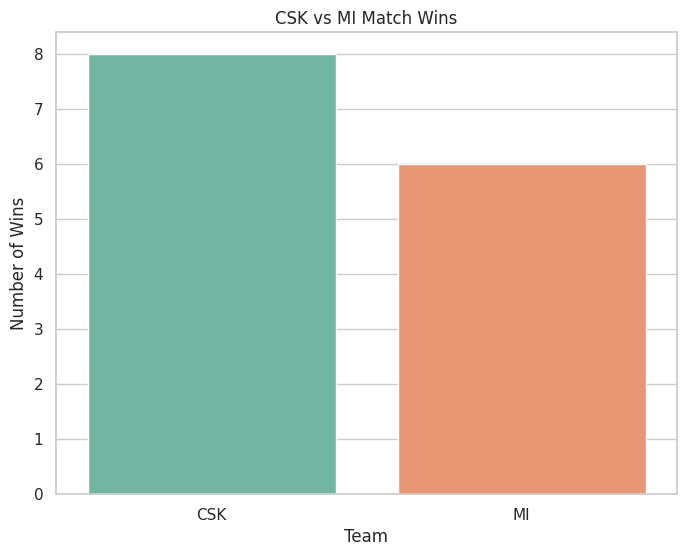

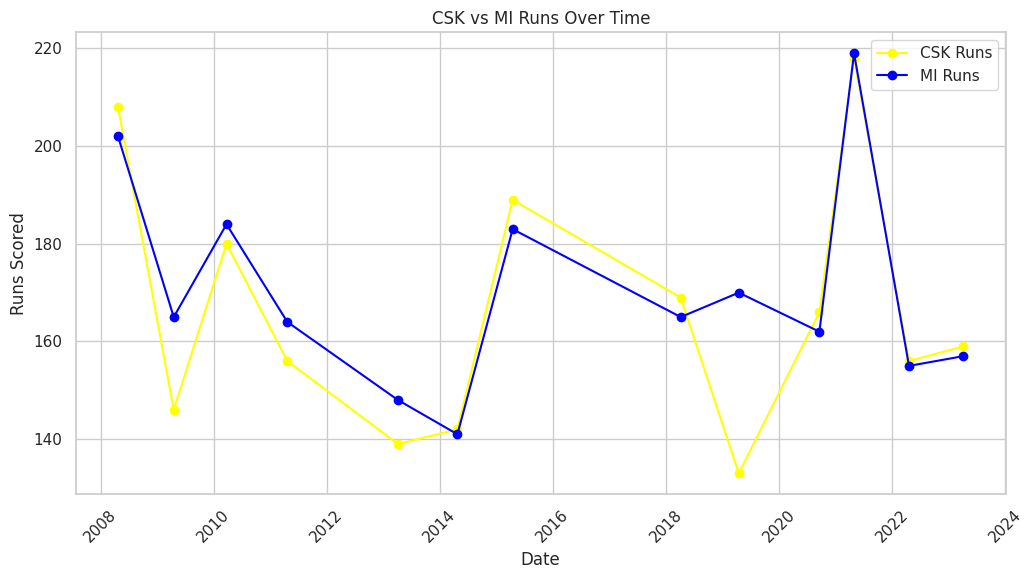

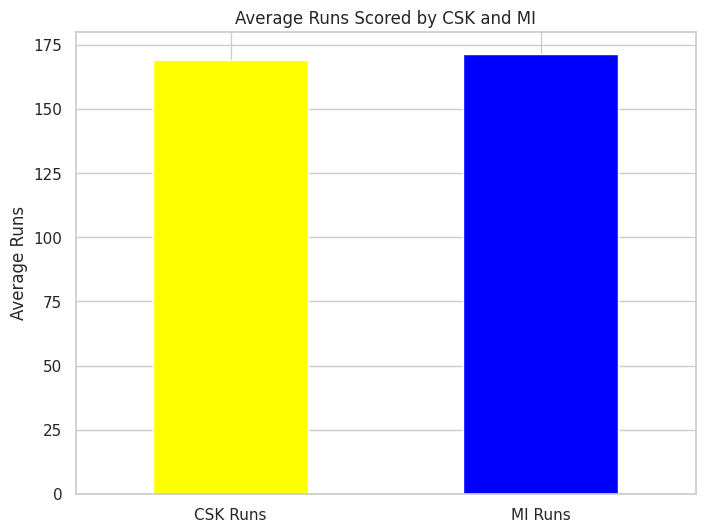

<Figure size 1000x600 with 0 Axes>

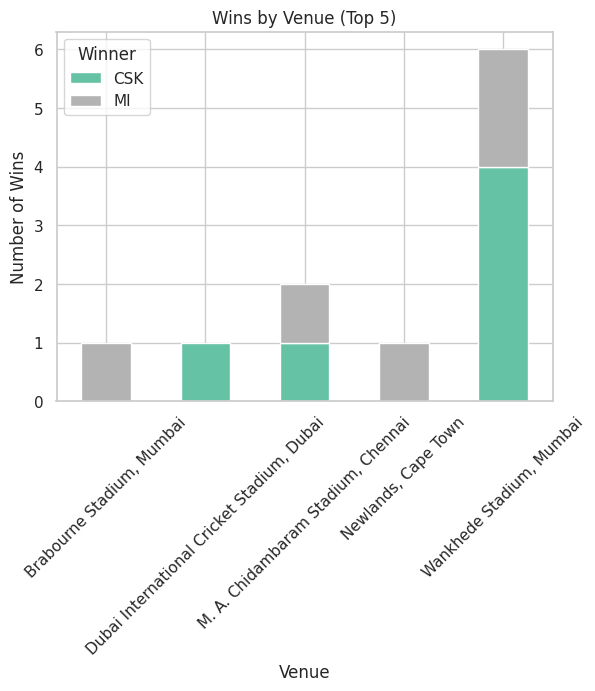

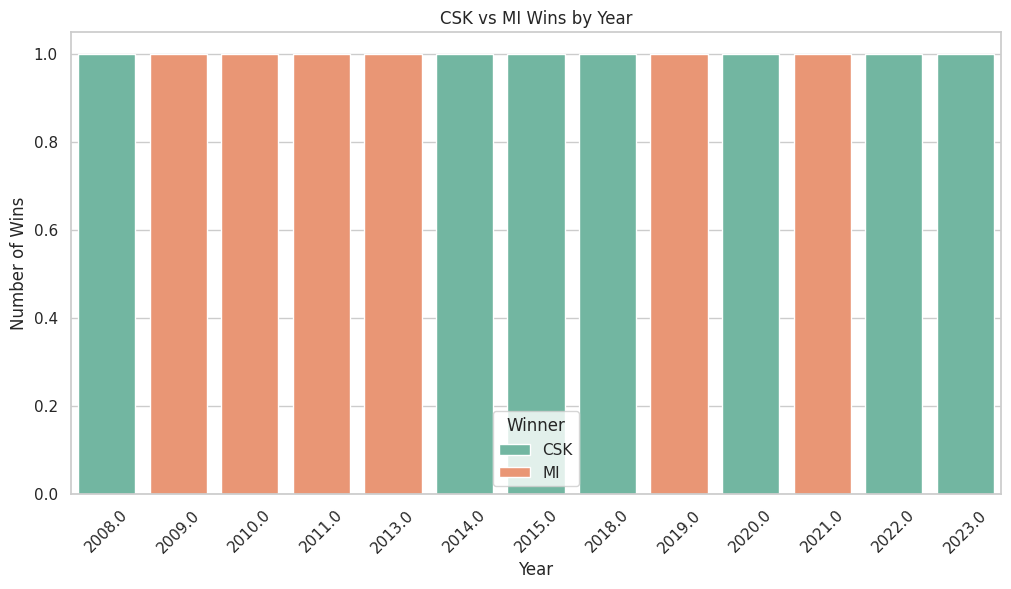

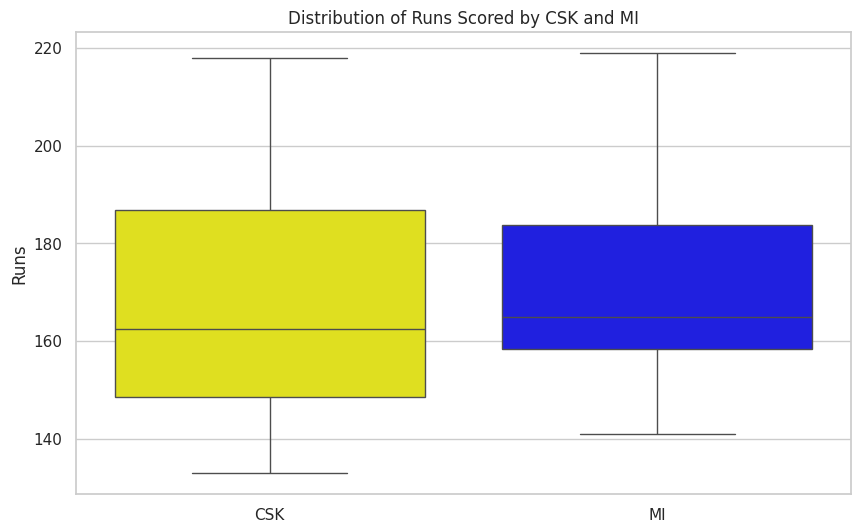

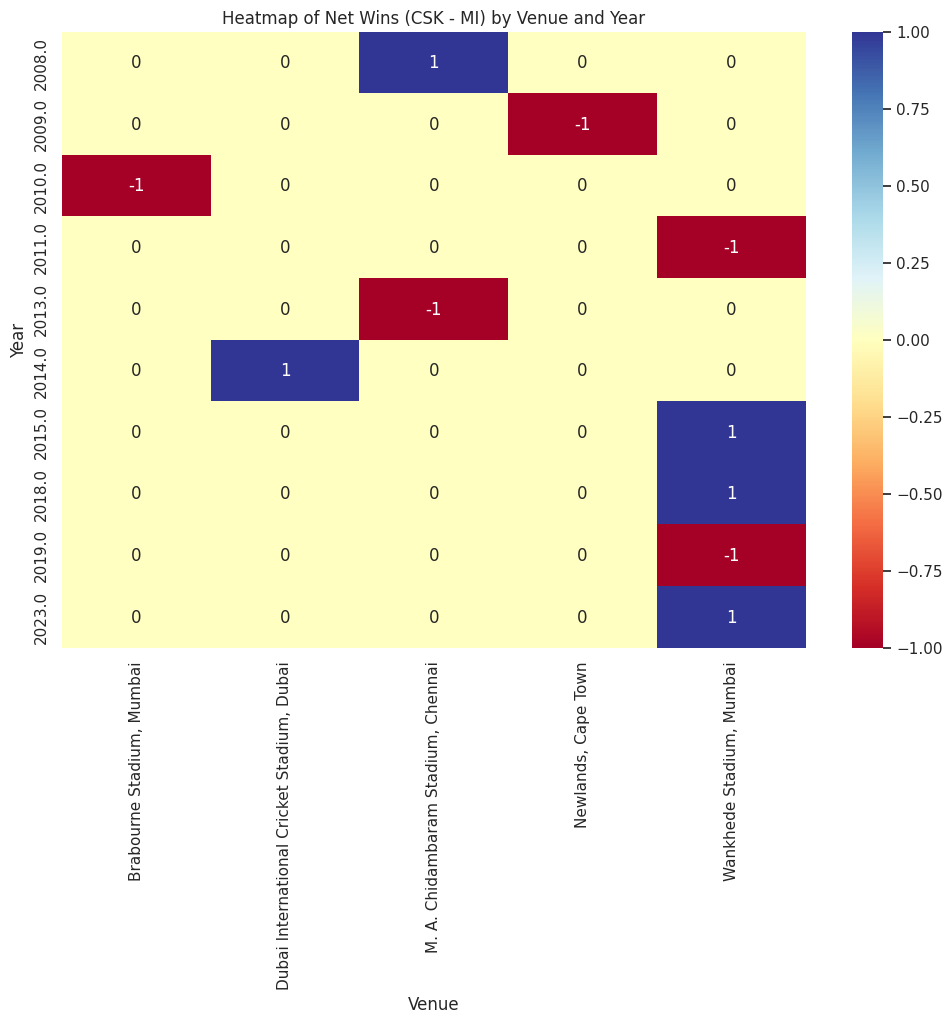


=== Key Insights ===
Total Matches: 14
CSK Wins: 8 (57.1%)
MI Wins: 6 (42.9%)
Average CSK Runs: 169.1
Average MI Runs: 171.5

Most Frequent Venue:
Ground
Wankhede Stadium, Mumbai    6
Name: count, dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv('csk_vs_mi_ipl_stats.csv')

# --- Data Cleaning ---
# Convert Date to datetime (extracting just the date part)
df['Date'] = df['Date'].apply(lambda x: ' '.join(x.split()[:3]))  # e.g., "23 April 2008"
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y', errors='coerce')
df['Year'] = df['Date'].dt.year

# Determine Winner
def determine_winner(result):
    if 'CSK' in result or 'Chennai Super Kings' in result:
        return 'CSK'
    elif 'MI' in result or 'Mumbai Indians' in result:
        return 'MI'
    else:
        return 'Unknown'

df['Winner'] = df['Result'].apply(determine_winner)

# Extract runs from scores
def extract_runs(score):
    try:
        return int(score.split('/')[0])
    except:
        return None

df['CSK Runs'] = df['CSK Score'].apply(extract_runs)
df['MI Runs'] = df['MI Score'].apply(extract_runs)

# --- Data Overview ---
print("=== Data Overview ===")
print(df.head())
print("\nShape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# --- Summary Statistics ---
print("\n=== Summary Statistics ===")
print(df.describe(include='all'))
win_counts = df['Winner'].value_counts()
print("\nWin Counts:")
print(win_counts)

# --- Visualizations ---
sns.set(style="whitegrid")

# Plot 1: Win Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Winner', data=df, palette='Set2')
plt.title('CSK vs MI Match Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

# Plot 2: Runs Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['CSK Runs'], label='CSK Runs', marker='o', color='yellow')
plt.plot(df['Date'], df['MI Runs'], label='MI Runs', marker='o', color='blue')
plt.title('CSK vs MI Runs Over Time')
plt.xlabel('Date')
plt.ylabel('Runs Scored')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot 3: Average Runs by Team
avg_runs = df[['CSK Runs', 'MI Runs']].mean()
plt.figure(figsize=(8, 6))
avg_runs.plot(kind='bar', color=['yellow', 'blue'])
plt.title('Average Runs Scored by CSK and MI')
plt.ylabel('Average Runs')
plt.xticks(rotation=0)
plt.show()

# Plot 4: Wins by Venue (Top 5)
top_venues = df['Ground'].value_counts().index[:5]
venue_wins = df[df['Ground'].isin(top_venues)].groupby(['Ground', 'Winner']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
venue_wins.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Wins by Venue (Top 5)')
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Winner')
plt.show()

# Plot 5: Wins by Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Winner', data=df, palette='Set2')
plt.title('CSK vs MI Wins by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

# --- New Visualization 1: Box Plot of Runs Distribution ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CSK Runs', 'MI Runs']], palette=['yellow', 'blue'])
plt.title('Distribution of Runs Scored by CSK and MI')
plt.ylabel('Runs')
plt.xticks([0, 1], ['CSK', 'MI'])
plt.show()

# --- New Visualization 2: Heatmap of Wins by Venue and Year ---
# Filter for top venues and pivot data
top_venues = df['Ground'].value_counts().index[:5]
heatmap_data = df[df['Ground'].isin(top_venues)].pivot_table(index='Year', columns='Ground', values='Winner',
                                                              aggfunc=lambda x: sum(x == 'CSK') - sum(x == 'MI'), fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='RdYlBu', center=0, fmt='.0f')
plt.title('Heatmap of Net Wins (CSK - MI) by Venue and Year')
plt.xlabel('Venue')
plt.ylabel('Year')
plt.show()

# --- Key Insights ---
print("\n=== Key Insights ===")
print(f"Total Matches: {len(df)}")
print(f"CSK Wins: {win_counts.get('CSK', 0)} ({win_counts.get('CSK', 0)/len(df)*100:.1f}%)")
print(f"MI Wins: {win_counts.get('MI', 0)} ({win_counts.get('MI', 0)/len(df)*100:.1f}%)")
print(f"Average CSK Runs: {df['CSK Runs'].mean():.1f}")
print(f"Average MI Runs: {df['MI Runs'].mean():.1f}")
print("\nMost Frequent Venue:")
print(df['Ground'].value_counts().head(1))